In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv(r'C:\Users\aimbe\Downloads\ads_data.csv')

In [8]:
df.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [9]:
df['full_date'] = pd.to_datetime(df.time, unit = 's')

In [11]:
df['date'] = pd.to_datetime(df.date)

In [13]:
df.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

<AxesSubplot:xlabel='date'>

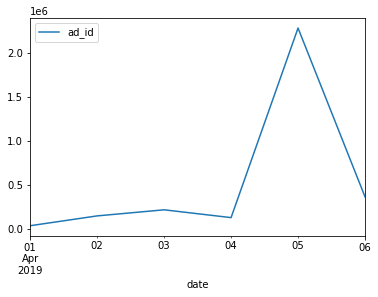

In [15]:
df.groupby('date')\
.agg({'ad_id':'count'})\
.plot()

In [30]:
df\
.groupby(['date', 'event'], as_index = False)\
.agg({'ad_id':'count'})\
.pivot(index = 'date', columns = 'event', values = 'ad_id').reset_index()#pivot creating

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [40]:
df[df.date == '2019-04-05']\
.groupby('ad_id', as_index = False)\
.agg({'full_date':'count'})\
.sort_values('full_date', ascending = False)

,ad_id,full_date
108,112583,2166611
27,29927,27186
65,44635,8268
81,46583,7327
66,44956,5656
...,...,...
77,46433,17
17,21405,16
76,46024,16
112,113867,15


In [47]:
ad_id =112583

In [51]:
df.query('ad_id == @ad_id')\
.groupby('date',as_index = False)\
.agg({'time':'count'})

,date,time
0,2019-04-05,2166611
1,2019-04-06,348613


In [56]:
ads_data = df\
.groupby(['ad_id', 'event'], as_index = False)\
.agg({'time':'count'})\
.pivot(index = 'ad_id', columns = 'event', values = 'time').reset_index()#ctr

In [59]:
ads_data = ads_data.assign(ctr = ads_data.click / ads_data.view, ctr_per = 100* ads_data.click / ads_data.view)

In [64]:
ads_data.sort_values('ctr', ascending = False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

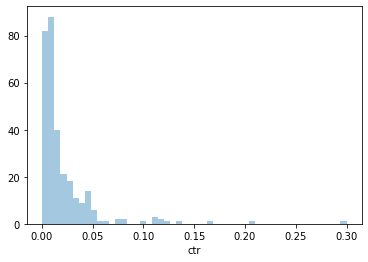

In [66]:
sns.distplot(ads_data.ctr, kde = False)

In [69]:
ads_data = ads_data.fillna(0) #searching for log bugs

In [76]:
id_bugs = ads_data.query('view == 0').ad_id

In [77]:
id_bugs

50      25665
77      30381
150     41424
161     42241
213     45866
219     46363
224     46544
294    113348
331    120444
Name: ad_id, dtype: int64

In [87]:
df_2019_04_04 = df[df.date == '2019-04-04']\
.groupby(['ad_id', 'event'], as_index = False)\
.agg({'time':'count'})\
.pivot(index = 'ad_id', columns = 'event', values = 'time').reset_index().fillna(0)

In [88]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [92]:
df_2019_04_04[df_2019_04_04.ctr > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [94]:
df.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [96]:
df[(df.ad_cost_type == 'CPC') & (df.event == 'click')].ad_cost.sum()

84810.0

In [99]:
df[(df.ad_cost_type == 'CPM') & (df.event == 'view')].ad_cost.sum()/1000 #budgeting

497090.6778000003